In [1]:
import torch
import torchvision
from torchvision import transforms, datasets 
import torch.nn as nn
import torch.nn.functional as F
#importing the neural network classes/things lol

train = datasets.MNIST('', train = True, download = True, transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('', train = False, download = True, transform = transforms.Compose([transforms.ToTensor()]))
#importing MNIST data set, and defining train/test data. Importing as a tensor.
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)
#loading data in a batch of size 10 (for various reasons look at tut.). We shuffle train to have balanced training data.

In [2]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        #the parent class here is nn.Module, so we have super()._init_ to ensure it initialises with parent attributes
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        #fc is fully connected. Not sure if "fc" is doing that. Maybe its what Linear is? Then 1st para is in, 2nd para out
        
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        #relu stops 'explosions' by keeping neurons between 0 and 1
        return F.log_softmax(x, dim=1)
        #similar here but selects the most promising answer using a sigmoid function, not step, for some reason.
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [3]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
#this is us choosing which function we want to use to calculate loss. If we were dealing with vectors we would use mean square error. Since our ouput is scalar we use cross entropy. Parameters include weights on outputs to try and account for inbalanced data.
optimizer = optim.Adam(net.parameters(), lr=0.001)
#optim.: Adam "Adaptive Momentum", is a parameter adjustment algorithm. Net.parameters() then allows you to specifiy certain parameters to NOT adjust. lr = learning rate, kinda like how far do you 'hop' down your cost function for each iteration of training. Needs to be large enough to jump out of a hole, but not too large as to miss the main minima entirely or just hope back and foward over it. Later on will use dynamic learning rates which attempt to get the best of both worlds.


In [4]:
for epoch in range(3): # 3 full passes over data
    for data in trainset: # remember data in trainset is in a batch!
        X, y = data #remember data is in columns, with X being the 'features', i.e. tensor rep. of image. y is the target.
        net.zero_grad() #sets gradients to 0 before loss calc. Do this every step.
        output = net(X.view(-1,784)) #passes the flattened tensor to be processed by the NN.
        loss = F.nll_loss(output, y) #attains the loss value 
        loss.backward() #back propagation of loss through network.
        optimizer.step() #adjusts weights according to loss
    print(loss)   

tensor(0.0206, grad_fn=<NllLossBackward>)
tensor(0.3367, grad_fn=<NllLossBackward>)
tensor(0.1377, grad_fn=<NllLossBackward>)


In [5]:
correct = 0 
total = 0 

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1, 784))
        #print(output) LEARN ALL THIS
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                 correct += 1
            total += 1 
print("Accuracy: ", round(correct/total, 3))

Accuracy:  0.963


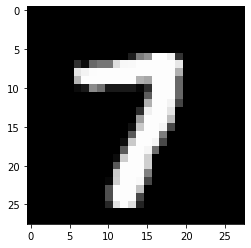

tensor(7)


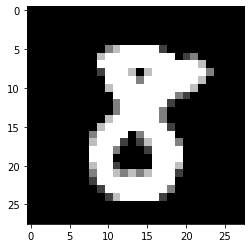

tensor(8)


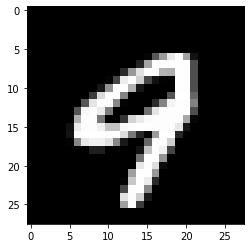

tensor(9)


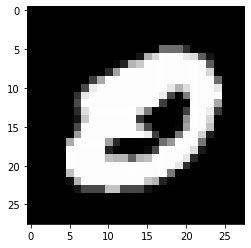

tensor(0)


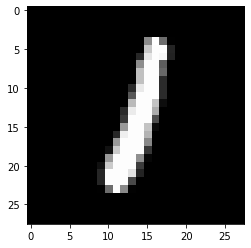

tensor(1)


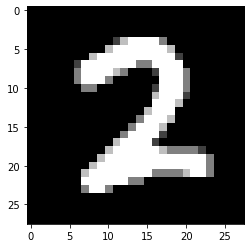

tensor(2)


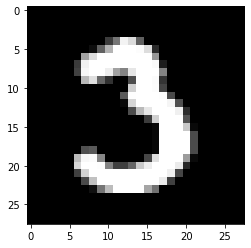

tensor(3)


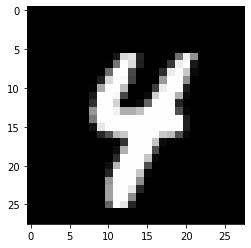

tensor(4)


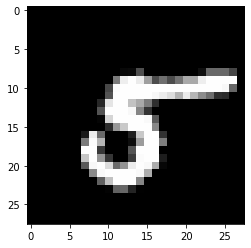

tensor(5)


In [17]:
import matplotlib.pyplot as plt

for i in range(9):
    plt.imshow(X[i].view(28,28), cmap='gray')
    plt.show()
    print(torch.argmax(net(X[i].view(-1,784))))